# Overview
This is our teams first attempt to explore the MTA Data!!

-  Stations with maximum traffic 
    - Traffic = Entries + Exit
-  Aggregated Traffic by Month for all stations
-  Aggregate data by time across stations
-  Office Locations by Stations
-  Explore data for 2 years
-  Cleaning Data
    -  See if there any nulls
    -  See if the station names have errors

In [1]:
import pandas as pd
import numpy as np
import math


In [2]:
!ls

Analysis Plan.ipynb     MTA Data Analysis.ipynb file_cleaner.sh
DownloadData.ipynb      README.md               merged_file.txt


In [3]:
mta_data = pd.read_csv("turnstile_190316.txt")

FileNotFoundError: [Errno 2] File b'turnstile_190316.txt' does not exist: b'turnstile_190316.txt'

## Exploring the Data

The next steps we will explore the data to get a better understanding of the data

In [ ]:
mta_data.head()

In [ ]:
stations = mta_data["STATION"].unique()

In [ ]:
len(stations)

### Group by


In [ ]:
mta_entries_exit_by_station = mta_data.groupby(['STATION'])[["ENTRIES","EXITS"]].agg('sum')

In [ ]:
list(mta_data)

In [ ]:
mta_entries_exit_by_station.describe()

In [ ]:
mta_entries_exit_by_station.sort_values(by="ENTRIES", ascending=False).head(10)

In [ ]:
mta_entries_exit_by_station.sort_values(by="EXITS", ascending=False).head(10)

In [ ]:
mta_data['TOTAL'] = mta_data['ENTRIES'] + mta_data['EXITS']

In [ ]:
mta_data

In [ ]:
mta_total_by_station = mta_data.groupby(['STATION'], as_index=False)[["TOTAL"]].agg('sum')

In [ ]:
mta_top_10_stations = mta_total_by_station.sort_values(by="TOTAL", ascending=False).head(10)

## Graphing

This is to graph the data

* !pip install seaborn

In [ ]:
import matplotlib as plt

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [ ]:
mta_total_by_station

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot('STATION', 'TOTAL', data=mta_top_10_stations)

In [ ]:
mta_top_10_stations

In [ ]:
!pip install requests BeautifulSoup4

## Tahmid Sandbox:

In [6]:
data_raw = pd.read_csv('merged_file.txt')

In [7]:
data_raw.head()

C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/30/2017  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/30/2017  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/30/2017  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/30/2017  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  12/30/2017  19:00:00   

      DESC  ENTRIES    EXITS  
0  REGULAR  6463109  2187558  
1  REGULAR  6463119  2187567  
2  REGULAR  6463178  2187654  
3  REGULAR  6463373  2187736  
4  REGULAR  6463712  2187803

In [8]:
data_raw.tail()

C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
10346281  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  03/29/2019   
10346282  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  03/29/2019   
10346283  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  03/29/2019   
10346284  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  03/29/2019   
10346285  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  03/29/2019   

              TIME     DESC  ENTRIES  EXITS  
10346281  05:00:00  REGULAR     5554    370  
10346282  09:00:00  REGULAR     5554    374  
10346283  13:00:00  REGULAR     5554    374  
10346284  17:00:00  REGULAR     5554    374  
10346285  21:00:00  REGULAR     5554    374

In [9]:
data_raw.describe()

ENTRIES         EXITS
count  1.034629e+07  1.034629e+07
mean   3.994067e+07  3.278422e+07
std    2.070362e+08  1.912352e+08
min    0.000000e+00  0.000000e+00
25%    4.796342e+05  2.282510e+05
50%    2.497562e+06  1.413401e+06
75%    6.903551e+06  4.810193e+06
max    2.144893e+09  2.146093e+09

In [10]:
data_zero = data_raw[data_raw.ENTRIES != 0]

In [11]:
data_zero = data_zero[data_zero.EXITS != 0]

In [12]:
data_zero.describe()

ENTRIES         EXITS
count  9.789058e+06  9.789058e+06
mean   4.158799e+07  3.464631e+07
std    2.125682e+08  1.964388e+08
min    1.000000e+00  1.000000e+00
25%    6.310660e+05  3.378712e+05
50%    2.796608e+06  1.636306e+06
75%    7.122874e+06  5.089708e+06
max    2.144893e+09  2.146093e+09

In [13]:
data_sample = data_zero.sample(100000)

In [14]:
data_sample.describe()

ENTRIES         EXITS
count  1.000000e+05  1.000000e+05
mean   4.186855e+07  3.481769e+07
std    2.132880e+08  1.961311e+08
min    1.000000e+00  1.000000e+00
25%    6.345035e+05  3.396178e+05
50%    2.809380e+06  1.639964e+06
75%    7.186918e+06  5.111328e+06
max    2.130152e+09  2.124333e+09

In [15]:
data_sample.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [16]:
data_sample['STATION']

6006991         STEINWAY ST
4997542     42 ST-PORT AUTH
9345072       BEVERLEY ROAD
7210835           CHURCH AV
5025885       NORTHERN BLVD
10194586     34 ST-PENN STA
3813930     42 ST-PORT AUTH
6092486       HARLEM 148 ST
1014374            BROAD ST
3963290          5 AV/59 ST
3640322         174-175 STS
258660          CHAMBERS ST
9081148               51 ST
8316066               49 ST
3965431      TIMES SQ-42 ST
4851639                7 AV
3359309       FLUSHING-MAIN
6703445     34 ST-HUDSON YD
1904333      JAMAICA CENTER
5143190          ST. GEORGE
1454715         CHAMBERS ST
2184049         SARATOGA AV
2541868               59 ST
5414865                7 AV
165295           FORDHAM RD
8812043      47-50 STS ROCK
8633702          9TH STREET
1467219         BEACH 67 ST
4694313              181 ST
7305165         GUN HILL RD
                 ...       
3167322         KINGSTON AV
7193868           BRIARWOOD
9173197               86 ST
9221343      47-50 STS ROCK
2020102             

In [17]:
data_sample.STATION.value_counts()

34 ST-PENN STA     2035
FULTON ST          1953
23 ST              1508
GRD CNTRL-42 ST    1471
34 ST-HERALD SQ    1193
CHAMBERS ST        1187
CANAL ST           1182
59 ST              1149
TIMES SQ-42 ST     1119
86 ST              1097
14 ST              1052
WALL ST            1049
ATL AV-BARCLAY     1041
42 ST-PORT AUTH    1026
PATH NEW WTC        972
125 ST              897
CORTLANDT ST        881
59 ST COLUMBUS      877
14 ST-UNION SQ      864
47-50 STS ROCK      829
50 ST               796
CHURCH AV           778
METS-WILLETS PT     775
96 ST               771
161/YANKEE STAD     755
LEXINGTON AV/53     719
JAY ST-METROTEC     702
BOWLING GREEN       695
28 ST               688
BOROUGH HALL        605
                   ... 
225 ST               66
VAN SICLEN AVE       66
SHEPHERD AV          65
25 AV                65
KOSCIUSZKO ST        65
FOREST AVE           64
PARKSIDE AV          64
NEREID AV            64
39 AV                64
138/GRAND CONC       63
BUSHWICK AV     

In [18]:
pd.set_option('display.max_rows',10000)

In [19]:
data_sample.TIME.value_counts()

04:00:00    7697
12:00:00    7632
16:00:00    7622
20:00:00    7595
00:00:00    7583
08:00:00    7525
17:00:00    3875
09:00:00    3865
21:00:00    3865
05:00:00    3842
13:00:00    3814
01:00:00    3776
15:00:00    3558
11:00:00    3477
07:00:00    3471
23:00:00    3405
03:00:00    3392
19:00:00    3373
02:00:00     289
10:00:00     283
14:00:00     280
22:00:00     278
06:00:00     266
18:00:00     266
16:22:00      87
20:22:00      85
12:22:00      83
04:22:00      82
00:22:00      79
08:22:00      76
19:22:00      58
10:30:00      51
06:30:00      47
14:30:00      46
11:22:00      45
18:30:00      45
15:22:00      43
02:30:00      41
22:30:00      38
07:22:00      38
03:22:00      36
21:30:00      36
23:22:00      34
16:30:00      31
01:30:00      30
13:30:00      29
00:30:00      28
17:30:00      28
07:30:00      25
04:30:00      24
09:30:00      24
05:30:00      22
19:30:00      20
12:30:00      19
20:30:00      19
11:30:00      19
08:30:00      18
15:30:00      17
23:30:00      

In [20]:
data_zero.TIME.value_counts()

04:00:00    746556
08:00:00    746291
16:00:00    746150
20:00:00    746145
12:00:00    745787
00:00:00    745059
05:00:00    372655
17:00:00    372526
09:00:00    372510
21:00:00    372455
13:00:00    372374
01:00:00    369679
03:00:00    339026
07:00:00    338878
19:00:00    338768
11:00:00    338765
15:00:00    338753
23:00:00    338730
18:00:00     27552
14:00:00     27519
10:00:00     27514
22:00:00     27486
06:00:00     27437
02:00:00     27283
12:22:00      7994
08:22:00      7989
20:22:00      7987
04:22:00      7986
16:22:00      7985
00:22:00      7929
15:22:00      4625
03:22:00      4625
07:22:00      4615
11:22:00      4608
19:22:00      4604
23:22:00      4599
10:30:00      4228
22:30:00      4224
18:30:00      4221
14:30:00      4220
06:30:00      4211
02:30:00      4184
01:30:00      2727
05:30:00      2698
09:30:00      2694
17:30:00      2679
13:30:00      2675
21:30:00      2665
20:30:00      2456
04:30:00      2447
08:30:00      2445
16:30:00      2444
12:30:00    

In [21]:
import datetime as dt

In [22]:
data_sample['TIME'] = pd.to_datetime(data_sample['TIME'],format= '%H:%M:%S' ).dt.time

In [23]:
data_sample.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

In [24]:
data_sample.TIME.value_counts()

04:00:00    7697
12:00:00    7632
16:00:00    7622
20:00:00    7595
00:00:00    7583
08:00:00    7525
17:00:00    3875
09:00:00    3865
21:00:00    3865
05:00:00    3842
13:00:00    3814
01:00:00    3776
15:00:00    3558
11:00:00    3477
07:00:00    3471
23:00:00    3405
03:00:00    3392
19:00:00    3373
02:00:00     289
10:00:00     283
14:00:00     280
22:00:00     278
06:00:00     266
18:00:00     266
16:22:00      87
20:22:00      85
12:22:00      83
04:22:00      82
00:22:00      79
08:22:00      76
19:22:00      58
10:30:00      51
06:30:00      47
14:30:00      46
18:30:00      45
11:22:00      45
15:22:00      43
02:30:00      41
22:30:00      38
07:22:00      38
03:22:00      36
21:30:00      36
23:22:00      34
16:30:00      31
01:30:00      30
13:30:00      29
00:30:00      28
17:30:00      28
07:30:00      25
04:30:00      24
09:30:00      24
05:30:00      22
19:30:00      20
20:30:00      19
11:30:00      19
12:30:00      19
08:30:00      18
15:30:00      17
23:30:00      

In [60]:
data_sample.head(10)

C/A  UNIT       SCP          STATION      LINENAME DIVISION  \
6006991    N315  R238  00-00-03      STEINWAY ST            MR      IND   
4997542   N063A  R011  00-00-09  42 ST-PORT AUTH  ACENQRS1237W      IND   
9345072    B017  R262  00-00-00    BEVERLEY ROAD            BQ      BMT   
7210835    N546  R204  00-00-00        CHURCH AV            FG      IND   
5025885    N318  R298  00-00-00    NORTHERN BLVD            MR      IND   
10194586   N067  R012  00-00-02   34 ST-PENN STA           ACE      IND   
3813930    N060  R010  01-00-01  42 ST-PORT AUTH  ACENGRS1237W      IND   
6092486    R309  R345  00-00-01    HARLEM 148 ST             3      IRT   
1014374    A083  R125  00-00-04         BROAD ST            JZ      BMT   
3963290    A006  R079  00-03-00       5 AV/59 ST          NQRW      BMT   

                DATE      TIME     DESC   ENTRIES     EXITS  
6006991   08/01/2018  12:00:00  REGULAR   6137758   6707291  
4997542   06/28/2018  16:00:00  REGULAR    452622    163653  
9345072   02/26/2019  19:00:00  REGULAR   4462240   2234976  
7210835   09/13/2018  00:00:00  REGULAR   5955083  15913441  
5025885   06/28/2018  05:00:00  REGULAR   5772168   6433101  
10194586  03/29/2019  12:00:00  REGULAR   8453045  10903247  
3813930   05/16/2018  06:00:00  REGULAR  14059251  12237610  
6092486   07/29/2018  08:00:00  REGULAR   1678268   1315805  
1014374   02/07/2018  20:00:00  REGULAR     26370    150107  
3963290   05/22/2018  06:00:00  REGULAR   8714590   3843460

In [25]:
data_sample.iloc[5:7]

C/A  UNIT       SCP          STATION      LINENAME DIVISION  \
10194586  N067  R012  00-00-02   34 ST-PENN STA           ACE      IND   
3813930   N060  R010  01-00-01  42 ST-PORT AUTH  ACENGRS1237W      IND   

                DATE      TIME     DESC   ENTRIES     EXITS  
10194586  03/29/2019  12:00:00  REGULAR   8453045  10903247  
3813930   05/16/2018  06:00:00  REGULAR  14059251  12237610

In [67]:
data_sample.iloc[5]['TIME'] > data_sample.iloc[6]['TIME'] 

True

In [27]:
data_s_round = data_sample[data_sample[TIME].dt.total_seconds() != 0]

NameError: name 'TIME' is not defined

In [28]:
entries_sample, exits_sample, station_sample = data_sample.ENTRIES, data_sample.EXITS, data_sample.STATION

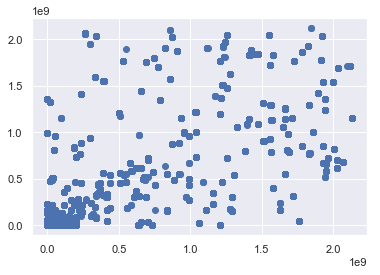

In [31]:
plt.scatter(entries_sample, exits_sample)

<BarContainer object of 100000 artists>

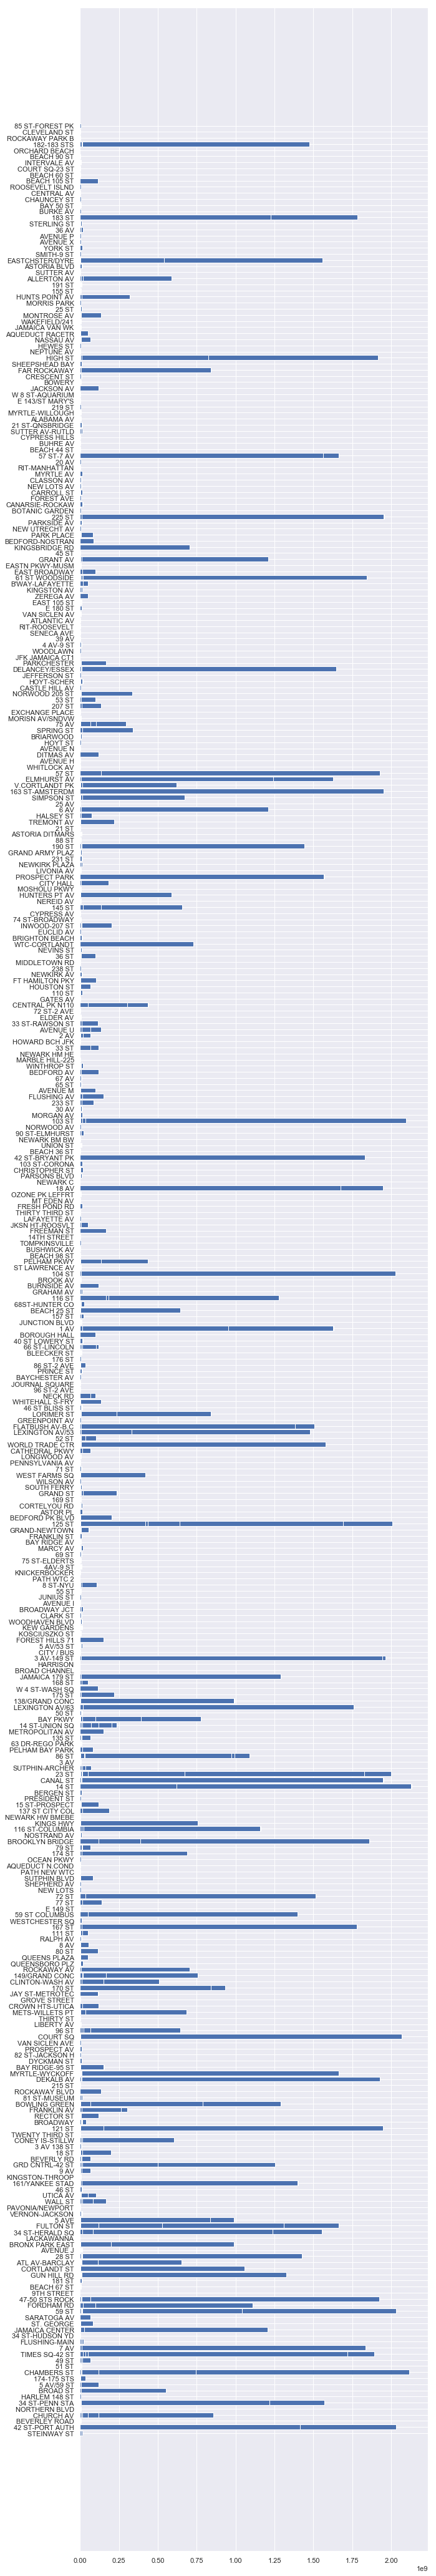

In [48]:
plt.figure(figsize=[10,75])
plt.barh(station_sample, entries_sample)

In [59]:
data_zero.groupby(['STATION','DATE','TIME'])[['ENTRIES','EXITS']].sum()

ENTRIES       EXITS
STATION         DATE       TIME                            
1 AV            01/01/2018 03:00:00  3042947337  1642545068
                           07:00:00  3042947783  1642545819
                           11:00:00  3042948650  1642546913
                           15:00:00  3042951071  1642549240
                           19:00:00  3042953851  1642552699
                           23:00:00  3042955764  1642554992
                01/01/2019 03:00:00  3041094366  1629407523
                           07:00:00  3041094797  1629408278
                           11:00:00  3041095642  1629409353
                           15:00:00  3041097952  1629411659
                           19:00:00  3041100841  1629415214
                           23:00:00  3041102742  1629417499
                01/02/2018 03:00:00  3042956363  1642555532
                           07:00:00  3042956819  1642556815
                           11:00:00  3042961508  1642562910
                           15:00:00  3042964925  1642566445
                           19:00:00  3042971928  1642572818
                           23:00:00  3042975031  1642576860
                01/02/2019 03:00:00  3041103233  1629417929
                           07:00:00  3041103591  1629418997
                           11:00:00  3041107950  1629425151
                           15:00:00  3041111287  1629428869
                           19:00:00  3041118032  1629435069
                           23:00:00  3041121218  1629438557
                01/03/2018 03:00:00  3042975878  1642577484
                           07:00:00  3042976414  1642578890
                           11:00:00  3042981489  1642585488
                           15:00:00  3042985038  1642589124
                           19:00:00  3042992446  1642595561
                           23:00:00  3042996295  1642599841
                01/03/2019 03:00:00  3041121874  1629439048
                           07:00:00  3041122321  1629440261
                           11:00:00  3041127052  1629446665
                           15:00:00  3041130455  1629450445
                           19:00:00  3041137399  1629457064
                           23:00:00  3041141084  1629461088
                01/04/2018 03:00:00  3042997290  1642600570
                           07:00:00  3042997697  1642601709
                           11:00:00  3043001524  1642605279
                           11:15:12   449406162   440102727
                           15:00:00  3043004119  1642607965
                           19:00:00  3043007436  1642611903
                           23:00:00  3043009300  1642614042
                01/04/2019 03:00:00  3041141779  1629461694
                           07:00:00  3041142170  1629462896
                           11:00:00  3041146784  1629469367
                           15:00:00  3041150476  1629473221
                           19:00:00  3041157168  1629479954
                           23:00:00  3041161473  1629484721
                01/05/2018 03:00:00  3043009917  1642614500
                           07:00:00  3043010328  1642615445
                           11:00:00  3043015228  1642621371
                           15:00:00  3043018777  1642625058
                           19:00:00  3043024923  1642631488
                           23:00:00  3043028808  1642636466
                01/05/2019 03:00:00  3041162955  1629485822
                           07:00:00  3041163250  1629486308
                           11:00:00  3041164606  1629488433
                           15:00:00  3041167731  1629492024
                           19:00:00  3041171851  1629497379
                           23:00:00  3041175403  1629501382
                01/06/2018 03:00:00  3043030385  1642637672
                           07:00:00  3043030683  1642638137
                           11:00:00  3043032189  1642640322
                           15:00:00  3043035653  1642644059
                    

In [79]:
data_head = data_zero.head(100000)

In [81]:
diff_test = data_head.diff(ENTRIES = 1, axis=0)

TypeError: diff() got an unexpected keyword argument 'ENTRIES'

In [82]:
data_zero.SCP.unique()

array(['02-00-00', '02-00-01', '02-03-00', '02-03-01', '02-03-02',
       '02-03-03', '02-03-04', '02-03-05', '02-03-06', '02-06-00',
       '00-00-00', '00-00-01', '00-00-02', '00-00-03', '00-00-04',
       '00-03-00', '00-03-01', '00-03-02', '01-05-01', '01-06-00',
       '01-06-01', '01-06-02', '01-06-03', '00-00-05', '00-00-06',
       '00-00-07', '01-00-00', '01-00-01', '01-00-02', '01-00-03',
       '01-00-04', '01-00-05', '01-03-00', '01-03-01', '01-03-02',
       '02-00-02', '02-06-01', '03-00-00', '03-00-01', '03-00-02',
       '03-06-00', '03-06-01', '01-00-06', '01-00-07', '01-03-03',
       '02-00-03', '02-00-04', '02-00-05', '03-03-00', '03-03-01',
       '03-03-02', '03-06-02', '05-00-00', '05-00-01', '05-00-02',
       '05-00-03', '00-06-00', '00-03-03', '00-03-04', '00-06-01',
       '00-06-02', '00-06-03', '00-06-04', '00-06-05', '00-06-06',
       '00-06-07', '00-06-08', '02-01-00', '02-01-01', '02-01-02',
       '02-05-00', '02-05-01', '00-02-00', '00-02-01', '00-05-

In [83]:
data_zero.groupby(['STATION','SCP'])[['ENTRIES','EXITS']].sum()

ENTRIES          EXITS
STATION         SCP                                   
1 AV            00-00-00    30076060785    33668510034
                00-00-01   129249974384    81640989808
                00-03-00   810426944548   847713161042
                00-03-01     4902691325     2077407954
                00-03-02    13250590357     1113037872
                01-00-00      466821618     7113528111
                01-00-01     5633062818    32314888363
                01-00-02     1184127559     2769307276
                01-00-03  2104270720587  2200292471620
                01-00-04  3179510192342   327790338362
103 ST          00-00-00   112240689930  1140044694474
                00-00-01    59159877072    24270073986
                00-00-02    76285487898    39721457933
                00-03-00    17962440917    10373245387
                00-03-01    29837970584    27330911305
                00-03-02   146583433348   164951824792
103 ST-CORONA   00-00-00    33351271243    52604729365
                00-00-01    30698023462    25760160248
                00-00-02     4054215160     2160617778
                00-00-03     1374532998      478930316
                00-00-04    10298483045     3032599404
                00-05-00    25787146793    11489030436
                00-05-01    23154757248    16553789817
                00-06-00     8052125214    21386778096
                00-06-01     9253889738    16439632598
104 ST          00-00-00    14878497782    12842647676
                00-00-01  2450015182718  4166387433879
                00-00-02  4431206652483  1360928391156
                00-00-03     9643783873    10221301990
                00-06-00     3114929111     5470476741
                00-06-01  3686927620015  2145497378615
110 ST          00-00-00     9672014021    15481968963
                00-00-01    11346857014    17831070930
                00-00-02    11487330936    26263301933
                01-00-00     6258197951     2886503546
                01-00-01     9227530362     2656750598
                01-00-02    29323920408     9634701498
111 ST          00-00-00    46134644752    37556923354
                00-00-01    39725315358    19408600016
                00-00-02    32291255502    19794915717
                00-00-03    17455339698    12600753491
                00-00-04     8067248023     7961503184
                01-04-00   110125935438    36708548608
                01-06-00     5507209511     1749367212
                01-06-01      315845440      166595848
116 ST          00-00-00    49173951257    38192091604
                00-00-01    29721152578    16392753351
                00-00-02    10595493364     9180734101
                00-00-03    27948067766    67011296575
                01-00-00   392716786649   381063364219
                01-00-01   421858719270   495445837683
                01-00-02  2329137028725  2949176952853
                01-00-03     3394675767      808248034
                01-00-04     9019773360     3921762280
                01-03-00    18033391685    19614083438
                01-03-01     4477428784     4112563586
116 ST-COLUMBIA 00-00-00    10250449307    11405258731
                00-00-01    24772233958    12058750677
                00-00-02    18318217146     5451462821
                00-00-03  2557518524228   519109923807
                00-03-00    30330602566    16843892865
                00-03-01    52658042276    12610173775
121 ST          00-00-00     7151989062     8113766531
                00-00-01     4568713060     2562130209
                00-00-02     1713719387      608876368
                00-00-03     4061419533     2321427284
                00-06-00     2490185745     2073435844
                00-06-01  1131312827770   285687528226
125 ST          00-00-00  5992394988426  3176419553382
                00-00-01    44486059641    40473355657
                00-00-02    75319596360    89697927760
                0

In [84]:
data_zero.groupby(['STATION','UNIT'])[['ENTRIES','EXITS']].sum()

ENTRIES           EXITS
STATION         UNIT                                
1 AV            R248   6278971186323   3536493640442
103 ST          R180    244963604644   1279041090669
                R191    133727553755     72526752898
                R314     63378741350     55124364310
103 ST-CORONA   R208    146024444901    149906268058
104 ST          R007   6896049429037   5545529834789
                R354   3699737236945   2155817795268
110 ST          R181     77315850692     74754297468
111 ST          R008     29941002890     26500776158
                R310    106718056331     65002098016
                R355    122963734501     44444333256
116 ST          R182    100089790066    121450761224
                R324     69396369372     36625011645
                R333   3126590309767   3826843914855
116 ST-COLUMBIA R159   2693848069481    577479462676
121 ST          R009   1151298854557    301367164462
125 ST          R034   1442240930434    748788333371
                R102   1103716931536    916777435186
                R132   2532974369079   1395014726259
                R206   5531746580248   2581096601791
135 ST          R207     97925745716     37394478751
                R332    192747308554     66367070200
137 ST CITY COL R169    525975826751   1840566467307
138/GRAND CONC  R307   2223266873524   2146561107629
14 ST           R105   3352341148112   3558521989788
                R163   1495799865689    963204699613
                R175   5279402628158   2647471961506
14 ST-UNION SQ  R170   1828814740216    666368170722
145 ST          R101    236804465892    241404720034
                R273   1796339984992   4086959019842
                R344     24487367972      1285437240
149/GRAND CONC  R205    196806144707     30354379497
14TH STREET     R545      6643050431      3433794831
15 ST-PROSPECT  R241    295577995889     14871433177
155 ST          R315     45878672341     30075134854
                R331     33421951376     29027344162
157 ST          R193     85334545492     53493795295
161/YANKEE STAD R195   4498594634047   2951673118511
163 ST-AMSTERDM R296    868386311522    299936499205
167 ST          R104   3525345236766   1699103116922
                R221     73207663333     57928557194
168 ST          R035    299930510580    145177237266
169 ST          R115     62411042395     52886404174
170 ST          R243   1485805041738    991629420739
                R443   2576245054752   3093631718162
174 ST          R386   1560624535315    698806345001
174-175 STS     R253     58716651181    261291004458
175 ST          R126    833960995669    677177906859
176 ST          R309     33340823313     21329425622
18 AV           R242   3875837099930   1767891349509
                R372     42970769131     28103831011
                R392    986060770308    642626138966
18 ST           R321    434976378869   1414687308054
181 ST          R174    133129487688    110374190930
                R260     80893628025     88784304378
182-183 STS     R237   1374913831867   1673558720108
183 ST          R275   7542561196642   5235817688732
190 ST          R280   1760204671164   2221422769220
191 ST          R274     31426782952     38749185266
2 AV            R300    285284745291    195605089136
20 AV           R373     25474049902     13772681349
                R393     35546513618     28411733661
207 ST          R037    344782633245     18602406070
21 ST           R360      8093532556      8020651327
21 ST-QNSBRIDGE R303     90742475457     80745692853
215 ST          R038     18310010115    372438002266
219 ST          R365     26823120111     15700395923
225 ST          R366   2713104693987    942115703497
23 ST           R083    344034224824     87944673231
                R111    674473417178   3060884712731
                R131   6690442092237   5785189281528
                R190     91441477054    104505357849
                R203     45136091365     31242424597
                R453   5474783903183   5758120595054
2

In [87]:
!pip install geopandas matplotlib
import geopandas as gpd

    100% |████████████████████████████████| 931kB 4.8MB/s ta 0:00:01
    100% |████████████████████████████████| 1.6MB 4.6MB/s ta 0:00:01
    100% |████████████████████████████████| 24.5MB 1.3MB/s ta 0:00:011  10% |███▍                            | 2.6MB 6.4MB/s eta 0:00:04
  Stored in directory: /Users/Tahmid/Library/Caches/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [88]:
plt.rcParams['figure.figsize'] = (20, 10)

In [89]:
geo_entrances = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=GeoJSON')

In [105]:
geo_entrances

line  \
0                        2-5   
1                        2-5   
2                        2-5   
3                        2-5   
4                        2-5   
5                        2-5   
6                        2-5   
7                        2-5   
8                        2-5   
9                        2-5   
10                       2-5   
11                       2-5   
12                       2-5   
13                       2-5   
14                       2-5   
15                       2-5   
16                       2-5   
17                       2-5   
18                       2-5   
19                       2-5   
20                       2-5   
21                       2-5   
22                       2-5   
23                       2-5   
24                       2-5   
25                       2-5   
26                       2-5   
27                       2-5   
28                       2-5   
29                         3   
30                         3   
31                         3   
32                       2-3   
33                       2-3   
34                       2-3   
35                       2-3   
36                       2-3   
37                       2-3   
38                       2-3   
39                         7   
40                         7   
41                         7   
42                         7   
43                         7   
44                         7   
45                         7   
46                         7   
47                         7   
48                         7   
49                         7   
50                         7   
51                         7   
52                         7   
53                         7   
54                         7   
55                         7   
56                         7   
57                         7   
58                         7   
59                         7   
60                         7   
61                         7   
62                         7   
63                         7   
64                         7   
65                         7   
66                         7   
67                         7   
68                         7   
69                         7   
70                         7   
71                         7   
72                         7   
73                         7   
74                         7   
75                         7   
76                         7   
77                         7   
78                         7   
79                         7   
80                         7   
81                         7   
82                         7   
83                         7   
84                         7   
85                         7   
86                         7   
87                     N-Q-7   
88                     N-Q-7   
89                   E-G-M-7   
90                   E-G-M-7   
91                   E-G-M-7   
92                         7   
93                         7   
94                         7   
95                         7   
96                         7   
97                 B-D-F-M-7   
98                       R-1   
99                       R-1   
100                      R-1   
101                      R-1   
102              N-Q-R-4-5-6   
103              N-Q-R-4-5-6   
104              N-Q-R-4-5-6   
105              N-Q-R-4-5-6   
106                    N-Q-R   
107                    N-Q-R   
108                    N-Q-R   
109                    N-Q-R   
110                    N-Q-R   
111                    N-Q-R   
112                    N-Q-R   
113                    N-Q-R   
114                    N-Q-R   
115                    N-Q-R   
116                    N-Q-R   
117                    N-Q-R   
118    A-C-E-N-Q-R-S-1-2-3-7   
119    A-C-E-N-Q-R-S-1-2-3-7   
120    A-C-E-N-Q-R-S-1-2-3-7   
121    A-C-E-N-Q-R-S-1-2-3-7   
122            B-D-F-M-N-Q-R   
123            B-D-F-M-N-Q-R   
124            B-D-F-M-N

In [107]:
geo_entrances.dtypes

line        object
name        object
objectid    object
url         object
geometry    object
dtype: object

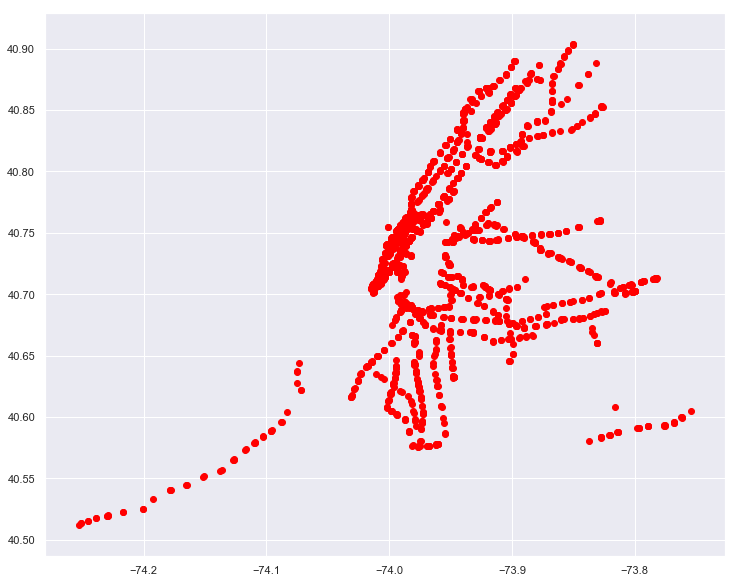

In [108]:
ax = geo_entrances.plot(color='red')